# Project 4

## Imports and Preliminary Work

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
df.shape

(150, 5)

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Create histogram of sepal length

<Axes: >

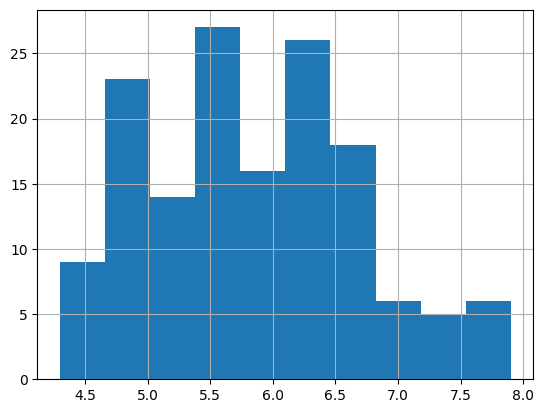

In [8]:
df['sepal_length'].hist()

In [10]:
# Inspect value counts by categorical column
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

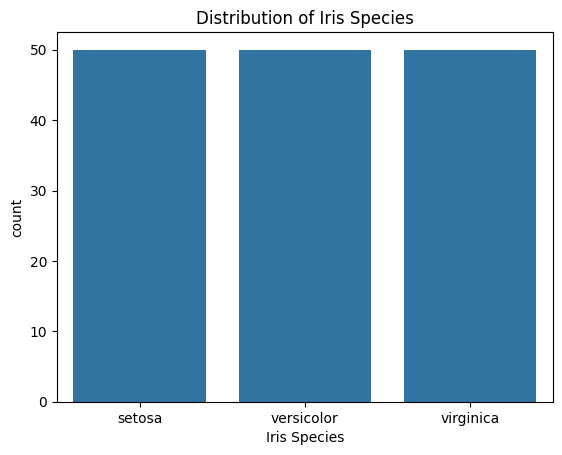

In [31]:

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

## Renaming and Creating New Columns

In [21]:
# Renaming a column
df.rename(columns={'species': 'Iris Species','petal_width':'Petal Width','petal_length':'Petal Length','sepal_width':'Sepal Width','sepal_length':'Sepal Length'}, inplace=True)

# Adding a new column
df['Petal Area'] = df['Petal Length'] * df['Petal Width']
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']
# verify changes
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Species,Petal Area,Sepal Area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


## Graphs and Analysis

<Axes: xlabel='Iris Species', ylabel='Petal Area'>

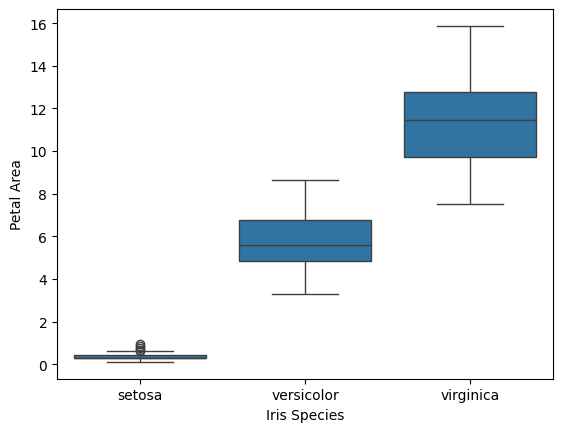

In [20]:
sns.boxplot(x="Iris Species", y="Petal Area", data=df)

The boxplot shows that the setosa species has a sigificantly lower petal area than the other two species, with a mean less than 0.5 compared to around five for versicolor and 11 for virginica. 

<Axes: xlabel='Petal Length', ylabel='Petal Width'>

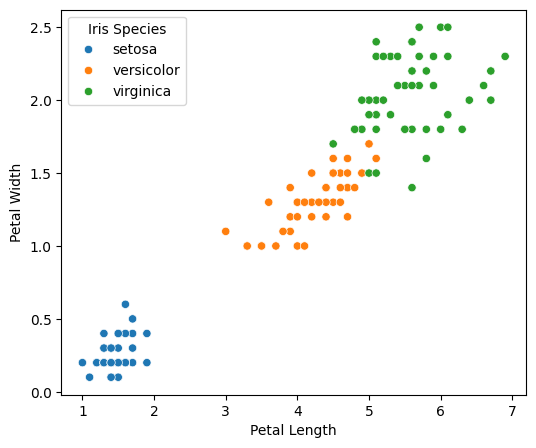

In [35]:
figure, axes = plt.subplots(figsize=(6, 5))
sns.scatterplot(x='Petal Length',y='Petal Width',hue='Iris Species', data=df)


This further demonstrates the trend by showing that both the width and length are preportional to area, without one being the dominate factor.

<Axes: xlabel='Iris Species', ylabel='Sepal Area'>

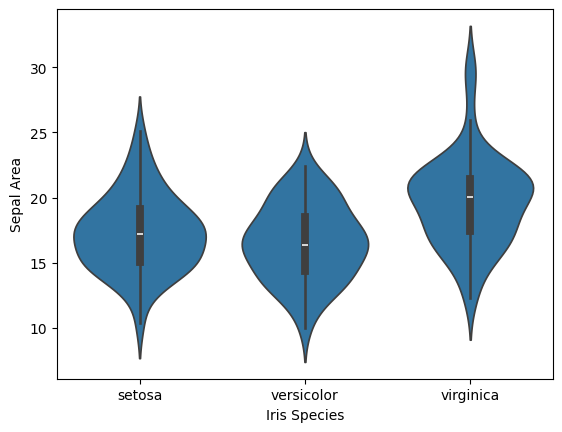

In [33]:
sns.violinplot(data=df,x='Iris Species', y='Sepal Area')

While they are all fairly simiar in terms of septal area, virginica is the largest and and has outliers on the high end.

(0.0, 8.08)

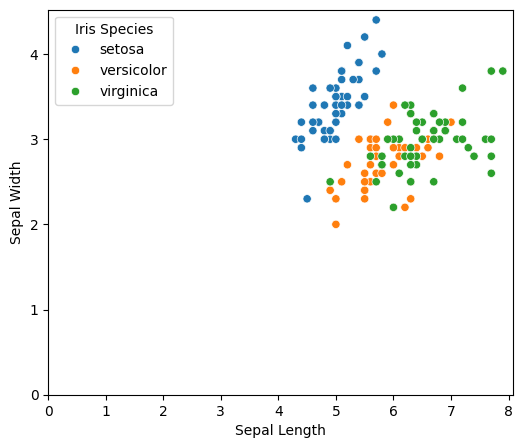

In [29]:
figure, axes = plt.subplots(figsize=(6, 5))
sns.scatterplot(x='Sepal Length',y='Sepal Width',hue='Iris Species', data=df)
axes.set_ylim(bottom=0)
axes.set_xlim(left=0)

Some differnces that were not visible in the violin plot emerge here. Setosa is clustered with shorter relative sepal lenths to widths while the other species have longer and thiner sepals.